# Brownlee, Jason (2019) Deep Learning With Python.Ed Brownlee, J. Ed. Machine Learning Mastery Pty. Ltd.
https://machinelearningmastery.com/

Problema: Predicción de series de tiempo.  
Serie:    Número mensual de pasajeros que viajaron en líneas aéreas en USA entre 1949 y 1960.  
Datos:    Año-mes, número de pasajeros.  
Modelo:   Red Neuronal - Perceptron

In [52]:
import numpy
import os
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense

In [53]:
# load the dataset(number passengers 1949-1960 in thousands)
dataframe = read_csv('international-airline-passengers.csv', usecols=[0,1], engine='python')
#dataframe['Month'].head(15)
dataframe.head(15)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [54]:
numpy.shape(dataframe)

(144, 2)

In [55]:
# load the dataset again column 1
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
numpy.shape(dataset)
dataset[:10]
#dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [56]:
# To make this notebook's output stable across runs
numpy.random.seed(42)

# To plot pretty figures
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:/Users/MII/Desktop/VP-Conce-2020/ML-Curso/ML-Jason Brownlee/Cap23"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images")
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [57]:
# Function to create the data set
# Equation f(yt) = f(yt-1)
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [59]:
dataframe.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [60]:
train_size, test_size

(96, 48)

In [61]:
print('trainX', trainX[0:10,:], 'trainY', trainY)

trainX [[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]] trainY [118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126. 141.
 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163. 172.
 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218. 230.
 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272. 237.
 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229. 203.
 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278. 284.
 277. 317. 313. 318. 374. 413. 405. 355. 306. 271.]


In [62]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=90, batch_size=2, verbose=2)

Epoch 1/90
 - 0s - loss: 23662.8756
Epoch 2/90
 - 0s - loss: 14576.4938
Epoch 3/90
 - 0s - loss: 8367.9435
Epoch 4/90
 - 0s - loss: 4398.8265
Epoch 5/90
 - 0s - loss: 2170.4771
Epoch 6/90
 - 0s - loss: 1124.5501
Epoch 7/90
 - 0s - loss: 701.5716
Epoch 8/90
 - 0s - loss: 584.3807
Epoch 9/90
 - 0s - loss: 553.3800
Epoch 10/90
 - 0s - loss: 544.0091
Epoch 11/90
 - 0s - loss: 539.7122
Epoch 12/90
 - 0s - loss: 537.9089
Epoch 13/90
 - 0s - loss: 543.0130
Epoch 14/90
 - 0s - loss: 545.0532
Epoch 15/90
 - 0s - loss: 538.9408
Epoch 16/90
 - 0s - loss: 539.3739
Epoch 17/90
 - 0s - loss: 538.0285
Epoch 18/90
 - 0s - loss: 538.2657
Epoch 19/90
 - 0s - loss: 541.7646
Epoch 20/90
 - 0s - loss: 538.6608
Epoch 21/90
 - 0s - loss: 546.4726
Epoch 22/90
 - 0s - loss: 543.3714
Epoch 23/90
 - 0s - loss: 542.9562
Epoch 24/90
 - 0s - loss: 540.8521
Epoch 25/90
 - 0s - loss: 545.1643
Epoch 26/90
 - 0s - loss: 542.6701
Epoch 27/90
 - 0s - loss: 540.0576
Epoch 28/90
 - 0s - loss: 544.9891
Epoch 29/90
 - 0s - l

In [63]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 534.66 MSE (23.12 RMSE)
Test Score: 2365.21 MSE (48.63 RMSE)


In [64]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [65]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

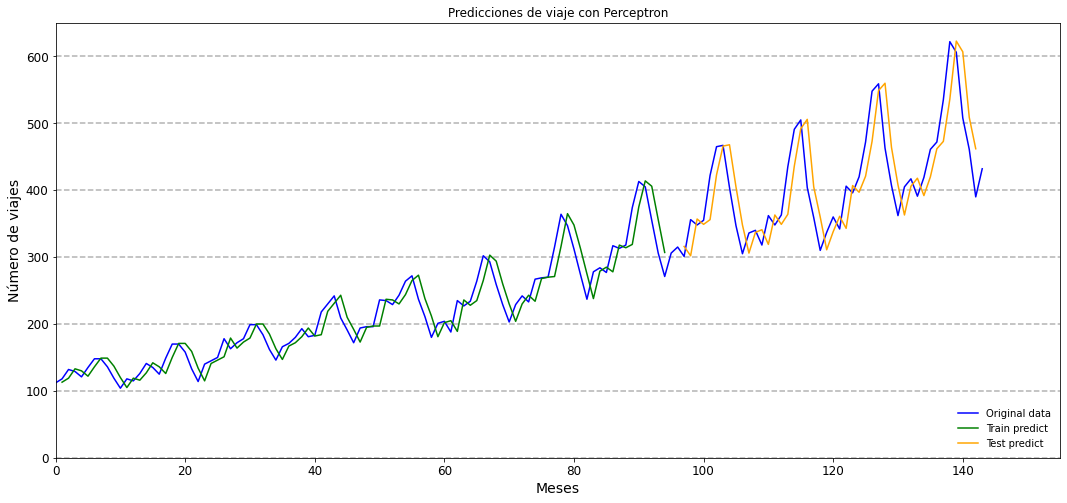

In [66]:
# Plot original data and predictions
fig, ax = plt.subplots(figsize=(18,8)) # Tamaño del gráfico
plt.plot(dataset, color="blue", label="Original data")

#Título del gráfico
ax.set_title('Predicciones de viaje con Perceptron')

# Define del eje y
ax.set_ylabel('Número de viajes')
plt.grid(True, 'major', 'y', ls='--', lw=1.5, c='k', alpha=.3)

#Define el eje x
ax.set_xlabel('Meses')
plt.tick_params(axis='x', which='major', labelsize=12)

plt.axis([0, 155,0,650])

plt.plot(trainPredictPlot, color="green", label="Train predict")
plt.plot(testPredictPlot, color="orange", label="Test predict")
ax.legend(loc="lower right", title="", frameon=False)


plt.show()
#save_fig("Pronóstico Perceptron")

